In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Super Mart Case Study Data.csv')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,16-06-2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,15-06-2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,13-05-2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,17-03-2014,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,29-01-2014,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,18-01-2014,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,01-11-2014,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,01-11-2014,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
df.shape

(2240, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [7]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [8]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [9]:
#Since There are only 21 Complains out of 2240 we can Drop this column
#df = df.drop('Complain' , axis=1)
#We Cant remove coomplaints because they have asked a question about it

### DATA CLEANING

In [10]:
df.rename(columns = {' Income ':'Income'}, inplace = True)

In [11]:
df.rename(columns = {'Response':'LastCampaign'}, inplace = True)
df.rename(columns = {'AcceptedCmp1':'Campaign1'}, inplace = True)
df.rename(columns = {'AcceptedCmp2':'Campaign2'}, inplace = True)
df.rename(columns = {'AcceptedCmp3':'Campaign3'}, inplace = True)
df.rename(columns = {'AcceptedCmp4':'Campaign4'}, inplace = True)
df.rename(columns = {'AcceptedCmp5':'Campaign5'}, inplace = True)

In [12]:
df.rename(columns = {'MntWines':'AmtSpent_Wine'}, inplace = True)
df.rename(columns = {'MntFruits':'AmtSpent_Fruit'}, inplace = True)
df.rename(columns = {'MntMeatProducts':'AmtSpent_Meat'}, inplace = True)
df.rename(columns = {'MntFishProducts':'AmtSpent_Fish'}, inplace = True)
df.rename(columns = {'MntSweetProducts':'AmtSpent_Sweet'}, inplace = True)
df.rename(columns = {'MntGoldProds':'AmtSpent_Gold'}, inplace = True)

In [13]:
df['Income'] = df['Income'].str.replace('$', '', regex=True)

In [14]:
df['Income'] = df['Income'].str.replace(' ', '', regex=True)

In [15]:
df['Income'] = df['Income'].str.replace(',', '', regex=True)

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,AmtSpent_Wine,...,NumStorePurchases,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,LastCampaign,Complain,Country
0,1826,1970,Graduation,Divorced,84835.00,0,0,16-06-2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.00,0,0,15-06-2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.00,0,1,13-05-2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.00,1,1,05-11-2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.00,1,0,04-08-2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.00,0,1,03-07-2013,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.00,1,0,22-01-2013,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.00,1,0,12-03-2012,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.00,0,0,29-11-2012,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [17]:
# Define a function to calculate the value of the "Members" column based on "Kidhome", "Teenhome", and "Marital_Status"
def calculate_members(row):
    if row["Marital_Status"] in ["Married", "Together"]:
        return row["Kidhome"] + row["Teenhome"] + 2
    else:
        return row["Kidhome"] + row["Teenhome"] + 1

# Apply the function to create the "Members" column
df["Members"] = df.apply(calculate_members, axis=1)

In [18]:
# Convert the "Dt_Customer" column to datetime type
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [19]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'AmtSpent_Wine', 'AmtSpent_Fruit',
       'AmtSpent_Meat', 'AmtSpent_Fish', 'AmtSpent_Sweet', 'AmtSpent_Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign3', 'Campaign4',
       'Campaign5', 'Campaign1', 'Campaign2', 'LastCampaign', 'Complain',
       'Country', 'Members'],
      dtype='object')

In [20]:
df["Total_Spent"] = df['AmtSpent_Wine'] + df['AmtSpent_Fruit'] + df['AmtSpent_Meat'] + df['AmtSpent_Fish'] + df['AmtSpent_Sweet'] + df['AmtSpent_Gold']


In [21]:
# Convert the "Income" column to float type
df["Income"] = pd.to_numeric(df["Income"])

In [22]:
# Define the income bins and labels
income_bins = [0, 60000, 100000, float('inf')]
income_labels = ['Low', 'Medium', 'High']

# Create the new column "Income_Seg" using pd.cut
df["Income_Seg"] = pd.cut(df["Income"], bins=income_bins, labels=income_labels, right=False)

# Display the DataFrame to see the new column
print(df.head())

      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  AmtSpent_Wine  ...  Campaign4  Campaign5  Campaign1  \
0  2014-06-16        0            189  ...          0          0          0   
1  2014-06-15        0            464  ...          0          0          0   
2  2014-05-13        0            134  ...          0          0          0   
3  2014-11-05        0             10  ...          0          0          0   
4  2014-08-04        0              6  ...          0          0          0   

   Campaign2  LastCampaign  Complain  Country  Mem

In [23]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [24]:
print(df['NumWebPurchases'].median())
print(df['Total_Spent'].median())

4.0
396.0


In [25]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,AmtSpent_Wine,...,Campaign4,Campaign5,Campaign1,Campaign2,LastCampaign,Complain,Country,Members,Total_Spent,Income_Seg
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,1,1190,Medium
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,1,577,Low
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,3,251,Medium
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,0,0,0,0,0,AUS,4,11,Low
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,0,0,0,0,1,0,SP,2,91,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,0,0,0,0,0,0,US,2,689,Medium
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,SP,3,55,Low
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,0,0,0,0,0,0,SP,2,309,Low
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,IND,2,1383,Medium


In [26]:
# Q1 - Count the number of customers who accepted the first two campaigns (AcceptedCmp1 and AcceptedCmp2)
num_accepted_camp1_camp2 = df[(df['Campaign1'] == 1) & (df['Campaign2'] == 1)].shape[0]
num_accepted_camp1_camp2

13

In [27]:
#Income column has extreme outliers
# Filter rows with Income values less than or equal to 17000.00
df = df[df["Income"] <= 100000.00]

In [28]:
# Filter rows with Income values less than or equal to 17000.00
df = df[df["Total_Spent"] <= 1500.00]

In [29]:
# Replace '2n Cycle' with 'Masters'
df['Education'].replace('2n Cycle', 'Master', inplace=True)

In [30]:
# Drop the "Kidhome" and "Teenhome" columns from the DataFrame
df = df.drop(columns=["Kidhome", "Teenhome"])

In [31]:
# Remove leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Remove rows with null values in the "Income" column
df = df.dropna(subset=["Income"])

In [32]:
# Replace 'absurd' and 'alone' with 'YOLO'
df['Marital_Status'].replace(['Absurd', 'Alone'], 'YOLO', inplace=True)

### Section 3 :
To observe the univariate distributions of both object and numeric variables, we can use various plots and visuals. For object variables, we typically use bar plots or pie charts to visualize the frequency of each category. For numeric variables, we can use histograms or box plots to understand their distribution and central tendency. Let's proceed with creating the necessary plots and providing commentary for each variable

a. Object Variables:

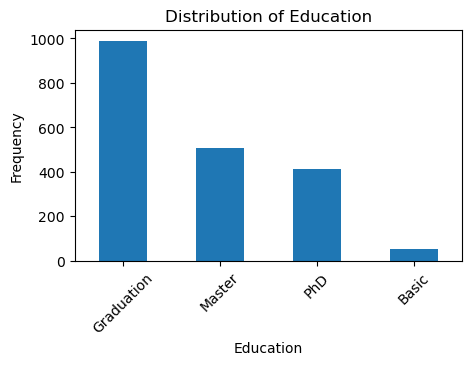

In [33]:
# Education:
# Bar plot for Education
plt.figure(figsize=(5, 3))
df["Education"].value_counts().plot(kind="bar")
plt.title("Distribution of Education")
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

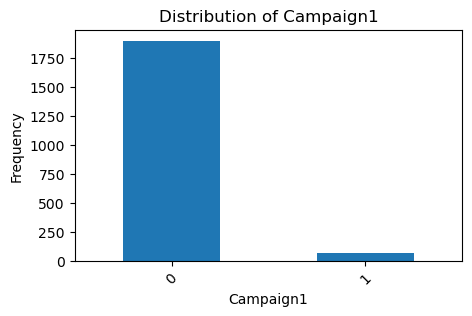

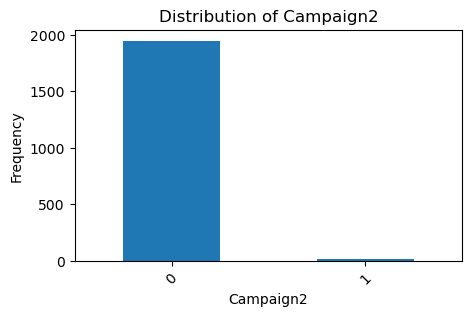

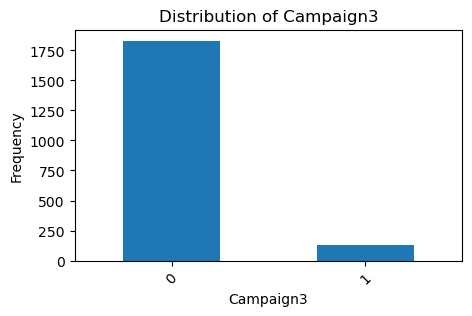

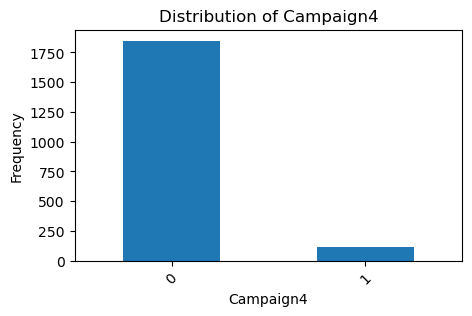

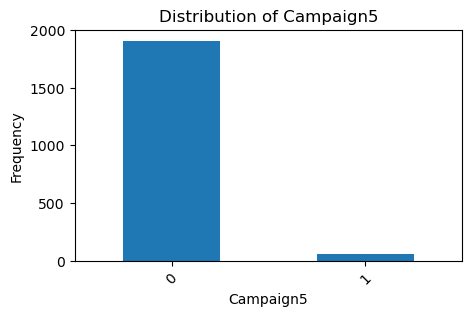

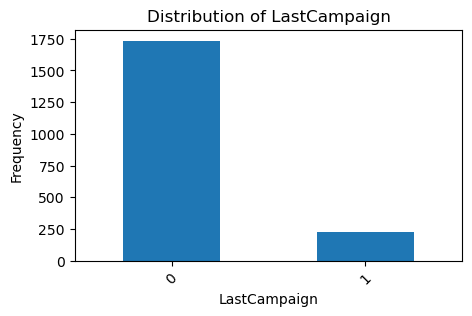

In [34]:
# Bar plot for Campaign1
plt.figure(figsize=(5, 3))
df["Campaign1"].value_counts().plot(kind="bar")
plt.title("Distribution of Campaign1")
plt.xlabel("Campaign1")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Bar plot for Campaign2
plt.figure(figsize=(5, 3))
df["Campaign2"].value_counts().plot(kind="bar")
plt.title("Distribution of Campaign2")
plt.xlabel("Campaign2")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Bar plot for Campaign3
plt.figure(figsize=(5, 3))
df["Campaign3"].value_counts().plot(kind="bar")
plt.title("Distribution of Campaign3")
plt.xlabel("Campaign3")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Bar plot for Campaign4
plt.figure(figsize=(5, 3))
df["Campaign4"].value_counts().plot(kind="bar")
plt.title("Distribution of Campaign4")
plt.xlabel("Campaign4")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Bar plot for Campaign4
plt.figure(figsize=(5, 3))
df["Campaign5"].value_counts().plot(kind="bar")
plt.title("Distribution of Campaign5")
plt.xlabel("Campaign5")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Bar plot for LastCampaign
plt.figure(figsize=(5, 3))
df["LastCampaign"].value_counts().plot(kind="bar")
plt.title("Distribution of LastCampaign")
plt.xlabel("LastCampaign")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

The bar plot shows the distribution of customers based on their education level. We observe that the majority of customers have completed their graduation, followed by PhD and Master's degrees. The least common education level is 2n Cycle.

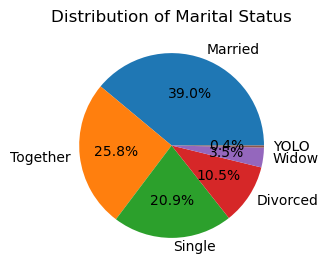

In [35]:
#Marital_Status:

# Pie chart for Marital_Status
plt.figure(figsize=(3, 3))
df["Marital_Status"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Marital Status")
plt.ylabel("")
plt.show()


The pie chart displays the distribution of customers based on their marital status. We can see that a significant proportion of customers are married, followed by single and together. Divorced, widow, and separated customers constitute a smaller proportion.

b. Numeric Variables:

<AxesSubplot:>

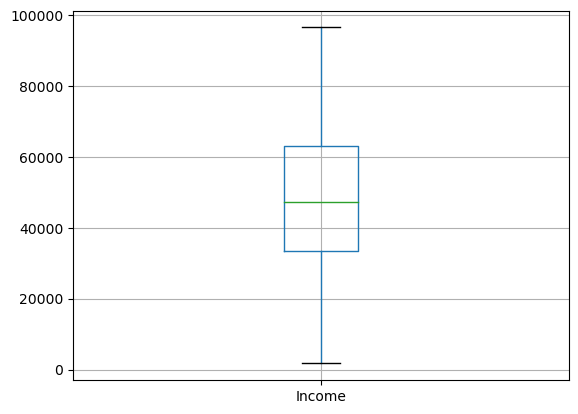

In [36]:
df.boxplot(column=['Income'])

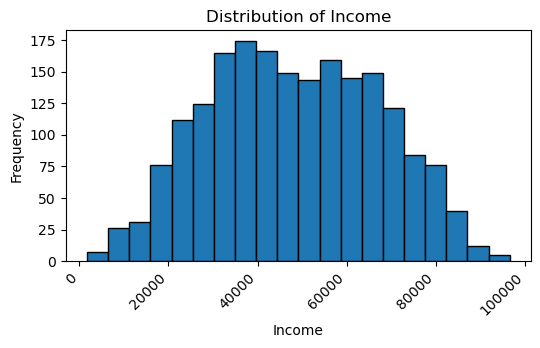

In [37]:
#Income:

# Histogram for Income
plt.figure(figsize=(6, 3))
plt.hist(df["Income"], bins=20, edgecolor="k")
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


The histogram represents the distribution of customers' income. The majority of customers have income in the lower range, and there are a few customers with higher income. The distribution is right-skewed, indicating that most customers have lower income, while a few have higher income.

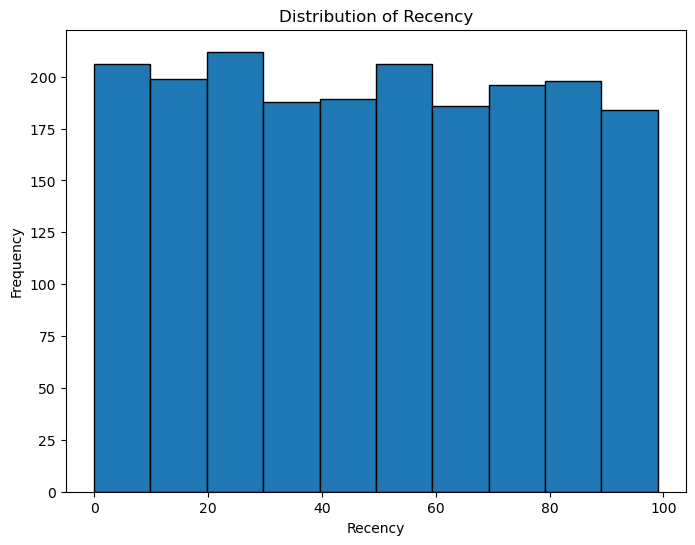

In [38]:
# Histogram for Recency
plt.figure(figsize=(8, 6))
plt.hist(df["Recency"], bins=10, edgecolor="k")
plt.title("Distribution of Recency")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.show()

 The histogram illustrates the distribution of the recency of customer purchases. The data seems to be relatively evenly distributed across the range of recency values. However, there is a slight dip in the frequency at the beginning, suggesting a few customers with very recent purchases.

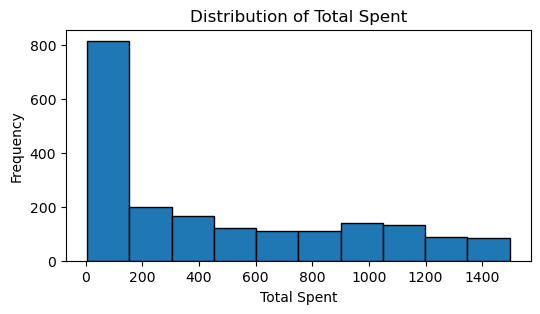

In [39]:
# Histogram for Total Spent
plt.figure(figsize=(6, 3))
plt.hist(df["Total_Spent"], bins=10, edgecolor="k")
plt.title("Distribution of Total Spent")
plt.xlabel("Total Spent")
plt.ylabel("Frequency")
plt.show()

In [40]:
'''plt.figure(figsize=(6, 3))
bins = pd.cut(df['NumWebPurchases'], bins=5)  # Divide the data into 5 bins
sns.boxplot(data=df, x=bins, y='NumWebPurchases')
plt.xlabel('NumWebPurchases')
plt.ylabel('Frequence')
plt.title(f'Box Plot of NumWebPurchases')
plt.show()'''

"plt.figure(figsize=(6, 3))\nbins = pd.cut(df['NumWebPurchases'], bins=5)  # Divide the data into 5 bins\nsns.boxplot(data=df, x=bins, y='NumWebPurchases')\nplt.xlabel('NumWebPurchases')\nplt.ylabel('Frequence')\nplt.title(f'Box Plot of NumWebPurchases')\nplt.show()"

<AxesSubplot:>

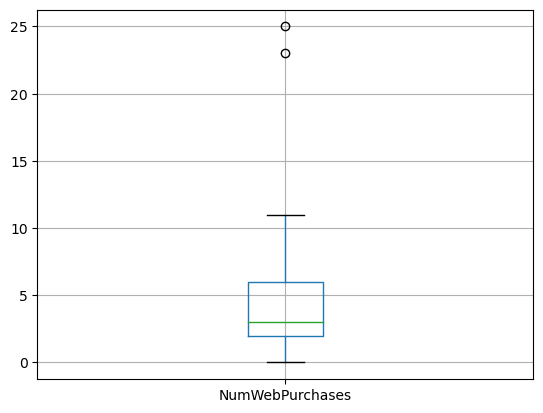

In [41]:
df.boxplot(column=['NumWebPurchases'])

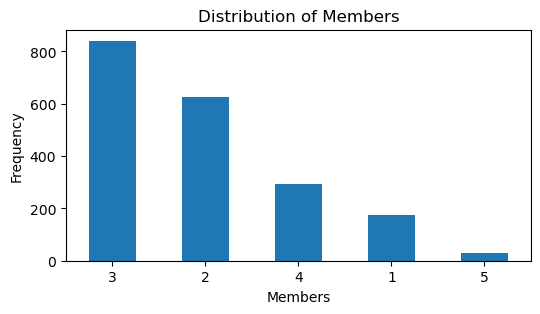

In [42]:
# Bar plot for Members
plt.figure(figsize=(6, 3))
df["Members"].value_counts().plot(kind="bar")
plt.title("Distribution of Members")
plt.xlabel("Members")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

We observe that most customers have three members in their family i.e they are single and have 2 kids or they are Couple and have 1 Kid .

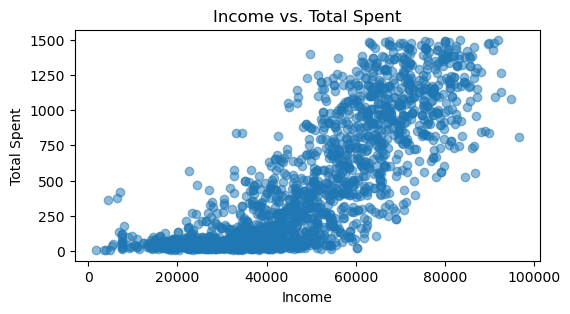

In [43]:
#Scatter Plot for Numeric Variables (Income vs. Total_Spent):

plt.figure(figsize=(6, 3))
plt.scatter(df["Income"], df["Total_Spent"], alpha=0.5)
plt.title("Income vs. Total Spent")
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.show()


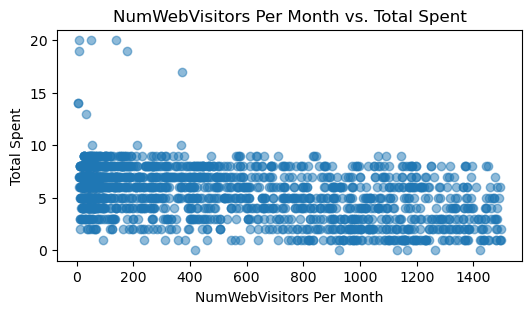

In [44]:
# scatter plot of 'Total_Spent' vs. 'NumWebVisitsMonth'
plt.figure(figsize=(6, 3))
plt.scatter(df["Total_Spent"], df["NumWebVisitsMonth"], alpha=0.5)
plt.title("NumWebVisitors Per Month vs. Total Spent")
plt.xlabel("NumWebVisitors Per Month")
plt.ylabel("Total Spent")
plt.show()

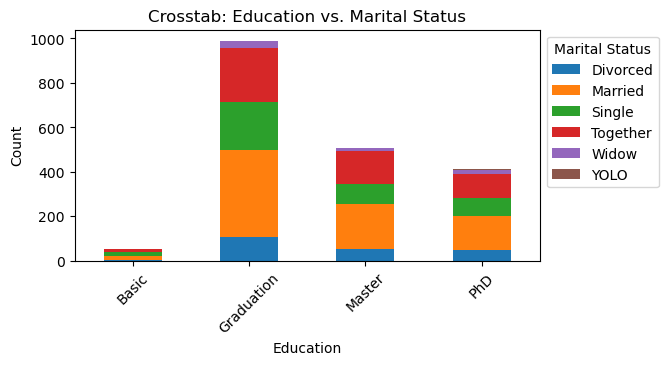

In [45]:
#Crosstabulation for Categorical Variables (Education vs. Marital_Status):

crosstab = pd.crosstab(df["Education"], df["Marital_Status"])

# Plotting the crosstab as a stacked bar plot
crosstab.plot(kind="bar", stacked=True, figsize=(6, 3))
plt.title("Crosstab: Education vs. Marital Status")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Marital Status", bbox_to_anchor=(1, 1))
plt.show()


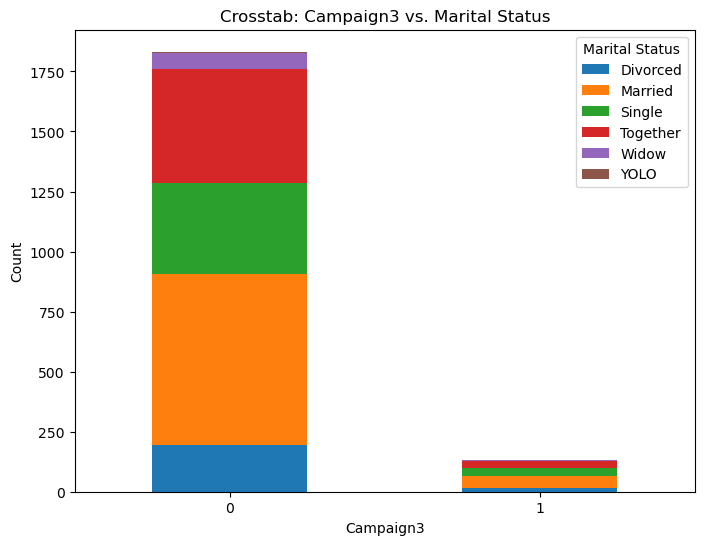

In [46]:
#Crosstabulation for Categorical Variables (Education vs. Marital_Status):

crosstab = pd.crosstab(df["Campaign3"], df["Marital_Status"])

# Plotting the crosstab as a stacked bar plot
crosstab.plot(kind="bar", stacked=True, figsize=(8, 6))
plt.title("Crosstab: Campaign3 vs. Marital Status")
plt.xlabel("Campaign3")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Marital Status", bbox_to_anchor=(1, 1))
plt.show()


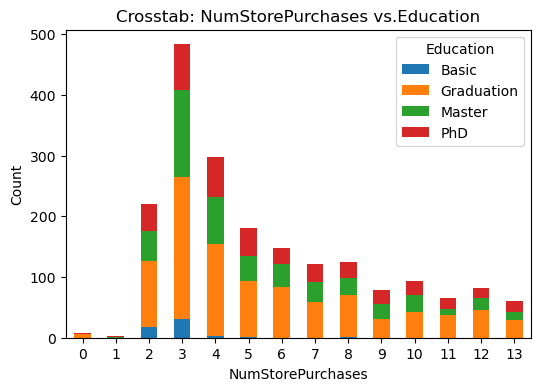

In [47]:
#Crosstabulation for Categorical Variables (Education vs. Marital_Status):

crosstab = pd.crosstab(df["NumStorePurchases"], df["Education"])

# Plotting the crosstab as a stacked bar plot
crosstab.plot(kind="bar", stacked=True, figsize=(6, 4))
plt.title("Crosstab: NumStorePurchases vs.Education")
plt.xlabel("NumStorePurchases")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Education", bbox_to_anchor=(1, 1))
plt.show()

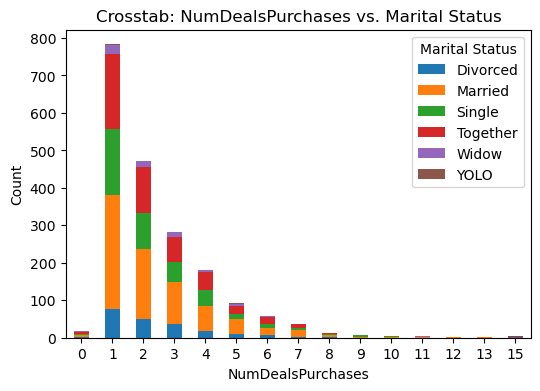

In [48]:
#Crosstabulation for Categorical Variables (Education vs. Marital_Status):

crosstab = pd.crosstab(df["NumDealsPurchases"], df["Marital_Status"])

# Plotting the crosstab as a stacked bar plot
crosstab.plot(kind="bar", stacked=True, figsize=(6, 4))
plt.title("Crosstab: NumDealsPurchases vs. Marital Status")
plt.xlabel("NumDealsPurchases")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Marital Status", bbox_to_anchor=(1, 1))
plt.show()

In [49]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,AmtSpent_Wine,AmtSpent_Fruit,AmtSpent_Meat,...,Campaign4,Campaign5,Campaign1,Campaign2,LastCampaign,Complain,Country,Members,Total_Spent,Income_Seg
0,1826,1970,Graduation,Divorced,84835.0,2014-06-16,0,189,104,379,...,0,0,0,0,1,0,SP,1,1190,Medium
1,1,1961,Graduation,Single,57091.0,2014-06-15,0,464,5,64,...,0,0,0,1,1,0,CA,1,577,Low
2,10476,1958,Graduation,Married,67267.0,2014-05-13,0,134,11,59,...,0,0,0,0,0,0,US,3,251,Medium
3,1386,1967,Graduation,Together,32474.0,2014-11-05,0,10,0,1,...,0,0,0,0,0,0,AUS,4,11,Low
4,5371,1989,Graduation,Single,21474.0,2014-08-04,0,6,16,24,...,0,0,0,0,1,0,SP,2,91,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,2013-07-03,99,372,18,126,...,0,0,0,0,0,0,US,2,689,Medium
2236,5263,1977,Master,Married,31056.0,2013-01-22,99,5,10,13,...,0,0,0,0,0,0,SP,3,55,Low
2237,22,1976,Graduation,Divorced,46310.0,2012-03-12,99,185,2,88,...,0,0,0,0,0,0,SP,2,309,Low
2238,528,1978,Graduation,Married,65819.0,2012-11-29,99,267,38,701,...,0,0,0,0,0,0,IND,2,1383,Medium


Section 04: KPI/ Metric based questions :

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1964 non-null   int64         
 1   Year_Birth           1964 non-null   int64         
 2   Education            1964 non-null   object        
 3   Marital_Status       1964 non-null   object        
 4   Income               1964 non-null   float64       
 5   Dt_Customer          1964 non-null   datetime64[ns]
 6   Recency              1964 non-null   int64         
 7   AmtSpent_Wine        1964 non-null   int64         
 8   AmtSpent_Fruit       1964 non-null   int64         
 9   AmtSpent_Meat        1964 non-null   int64         
 10  AmtSpent_Fish        1964 non-null   int64         
 11  AmtSpent_Sweet       1964 non-null   int64         
 12  AmtSpent_Gold        1964 non-null   int64         
 13  NumDealsPurchases    1964 non-nul

In [51]:
# Q1 - Count the number of customers who accepted the first two campaigns (AcceptedCmp1 and AcceptedCmp2)
num_accepted_camp1_camp2 = df[(df['Campaign1'] == 1) & (df['Campaign2'] == 1)].shape[0]
num_accepted_camp1_camp2

5

In [52]:
# Q2 - Group by NumWebVisitsMonth and calculate average, median, and count for NumWebPurchases
summary_df = df.groupby('NumWebVisitsMonth')['NumWebPurchases'].agg(['mean', 'median', 'count']).reset_index()
summary_df

,NumWebVisitsMonth,mean,median,count
0,0,5.666667,2.5,6
1,1,3.320755,3.0,106
2,2,3.917293,4.0,133
3,3,4.072368,4.0,152
4,4,4.335000,4.0,200
5,5,4.175573,4.0,262
6,6,4.110390,3.0,308
7,7,3.596817,3.0,377
8,8,3.780488,3.0,328
9,9,4.200000,3.0,80


In [53]:
# Q3 - Define a function to categorize the customers based on the given condition
def categorize_visits(row):
    if row['NumWebVisitsMonth'] < 10:
        return '<10 visits'
    else:
        return '>=10 visits'

def categorize_purchases(row):
    if row['NumStorePurchases'] < 10:
        return '<10 purchases'
    else:
        return '>=10 purchases'

def categorize_discount_purchases(row):
    if row['NumWebPurchases'] < 10:
        return '<10 purchases'
    else:
        return '>=10 purchases'

# Apply the categorization functions to create new columns
df['NumWebVisitsCategory'] = df.apply(categorize_visits, axis=1)
df['NumStorePurchasesCategory'] = df.apply(categorize_purchases, axis=1)
df['DiscountPurchasesCategory'] = df.apply(categorize_discount_purchases, axis=1)

# Group by the new columns and calculate average and median of Total_Spend for each group
summary_df_visits = df.groupby('NumWebVisitsCategory')['Total_Spent'].agg(['mean', 'median']).reset_index()
summary_df_purchases = df.groupby('NumStorePurchasesCategory')['Total_Spent'].agg(['mean', 'median']).reset_index()
summary_df_discount_purchases = df.groupby('DiscountPurchasesCategory')['Total_Spent'].agg(['mean', 'median']).reset_index()

In [54]:
print("Average and Median of Total_Spend based on NumWebVisitsCategory:")
print(summary_df_visits)
print("\nAverage and Median of Total_Spend based on NumStorePurchasesCategory:")
print(summary_df_purchases)
print("\nAverage and Median of Total_Spend based on DiscountPurchasesCategory:")
print(summary_df_discount_purchases)

Average and Median of Total_Spend based on NumWebVisitsCategory:
  NumWebVisitsCategory        mean  median
0           <10 visits  462.119877   275.0
1          >=10 visits  119.333333    52.0

Average and Median of Total_Spend based on NumStorePurchasesCategory:
  NumStorePurchasesCategory         mean  median
0             <10 purchases   359.523151   165.0
1            >=10 purchases  1015.292359  1012.0

Average and Median of Total_Spend based on DiscountPurchasesCategory:
  DiscountPurchasesCategory        mean  median
0             <10 purchases  440.468321   256.0
1            >=10 purchases  989.185714   992.5


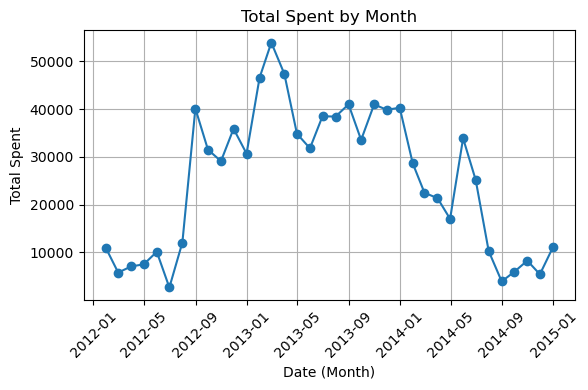

In [55]:
# Set 'Dt_Customer' as the index
df.set_index('Dt_Customer', inplace=True)

# Group the data by months and calculate total spent for each month
total_spent_by_month = df.resample('M')['Total_Spent'].sum()

# Create the line plot
plt.figure(figsize=(6, 4))
plt.plot(total_spent_by_month.index, total_spent_by_month.values, marker='o', linestyle='-')
plt.xlabel('Date (Month)')
plt.ylabel('Total Spent')
plt.title('Total Spent by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

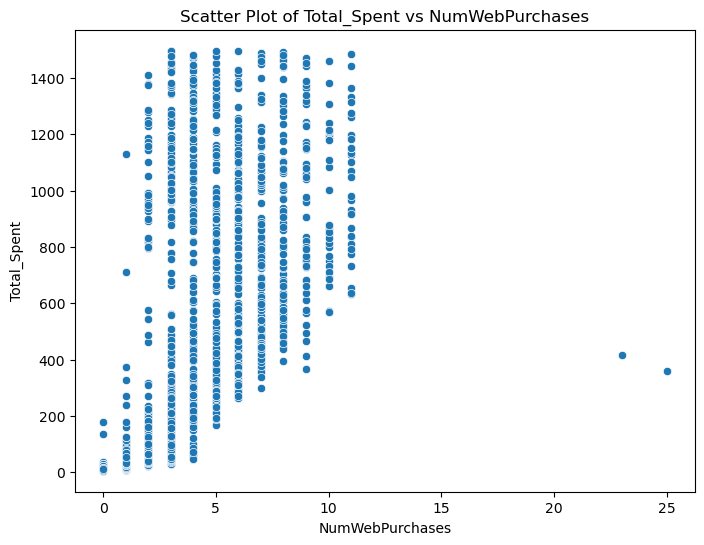

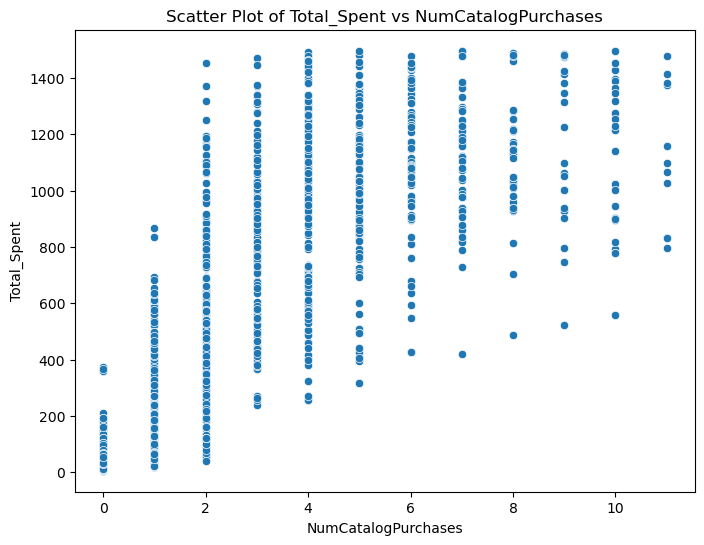

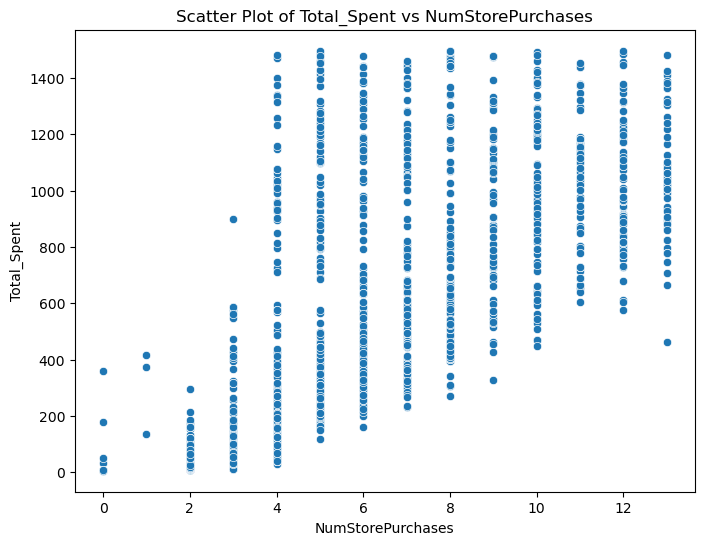

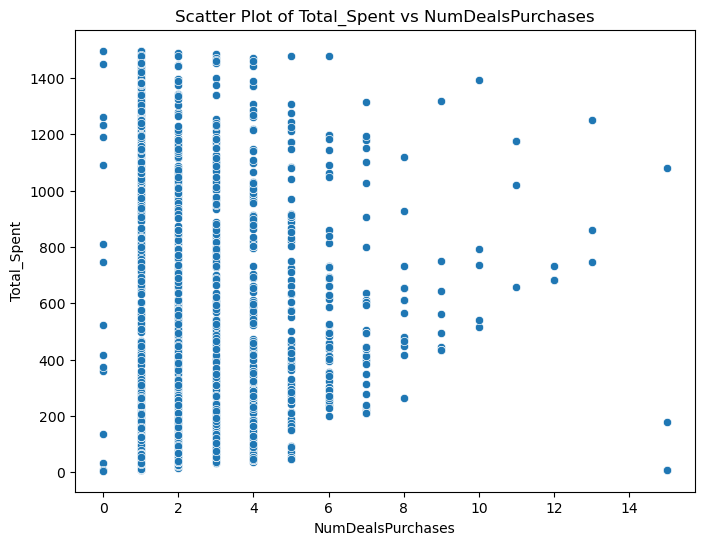

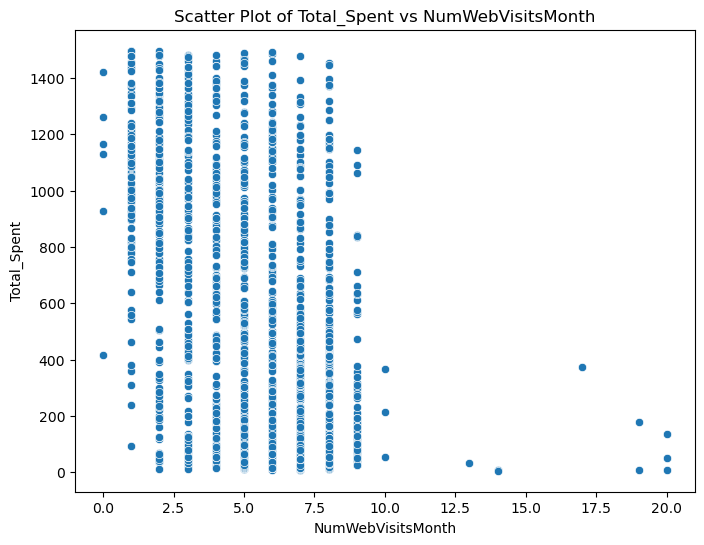

In [56]:
# Scatter plots for continuous variables
continuous_vars = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth']

for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=var, y='Total_Spent')
    plt.xlabel(var)
    plt.ylabel('Total_Spent')
    plt.title(f'Scatter Plot of Total_Spent vs {var}')
    plt.show()


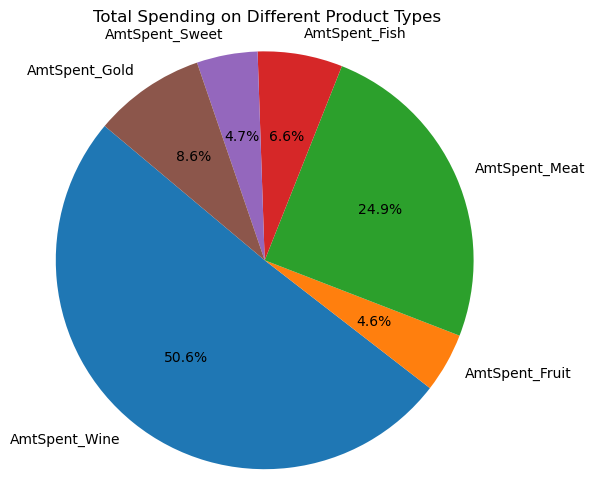

In [57]:
mnt_sum = df[['AmtSpent_Wine','AmtSpent_Fruit','AmtSpent_Meat', 'AmtSpent_Fish', 'AmtSpent_Sweet', 'AmtSpent_Gold']].sum()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(mnt_sum, labels=mnt_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Spending on Different Product Types')
plt.axis('equal')
plt.show()

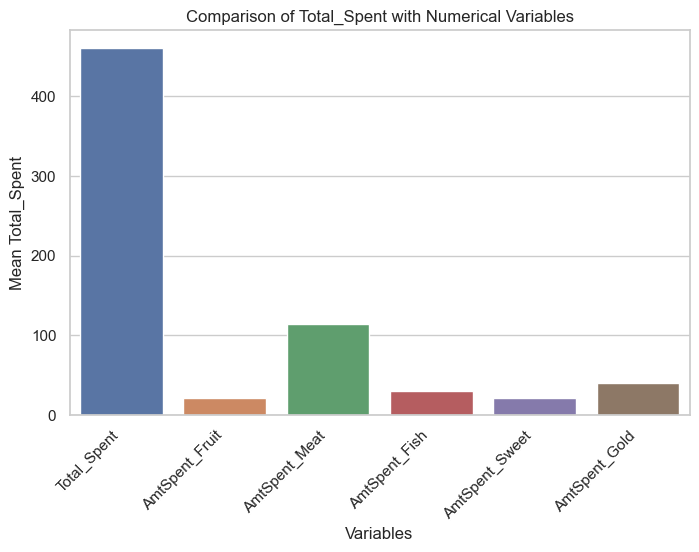

In [58]:
# Create a bar graph comparing 'Total_Spent' with all numerical variables
numeric_columns = ['Total_Spent', 'AmtSpent_Fruit','AmtSpent_Meat', 'AmtSpent_Fish', 'AmtSpent_Sweet', 'AmtSpent_Gold']

# Filter the data to include only the numerical columns
numeric_data = df[numeric_columns]

# Set the style for the plot
sns.set(style="whitegrid")

# Plot the bar graph
plt.figure(figsize=(8, 5))
sns.barplot(data=numeric_data, ci=None)
plt.title("Comparison of Total_Spent with Numerical Variables")
plt.xlabel("Variables")
plt.ylabel("Mean Total_Spent")
plt.xticks(rotation=45, ha="right")
plt.show()

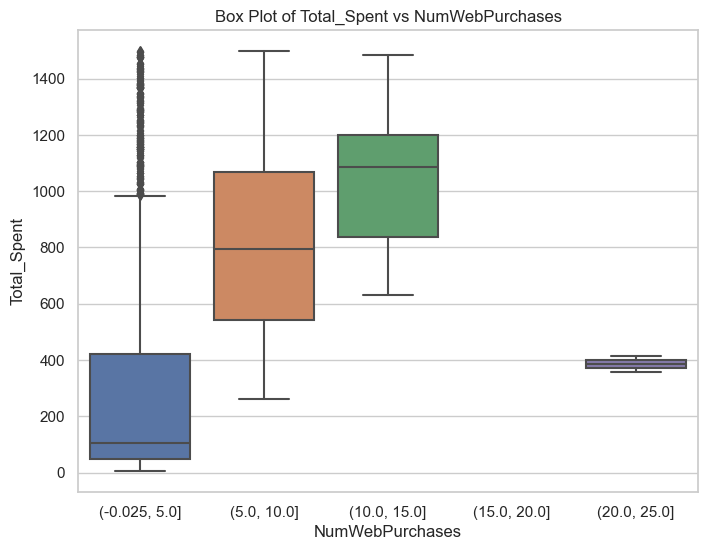

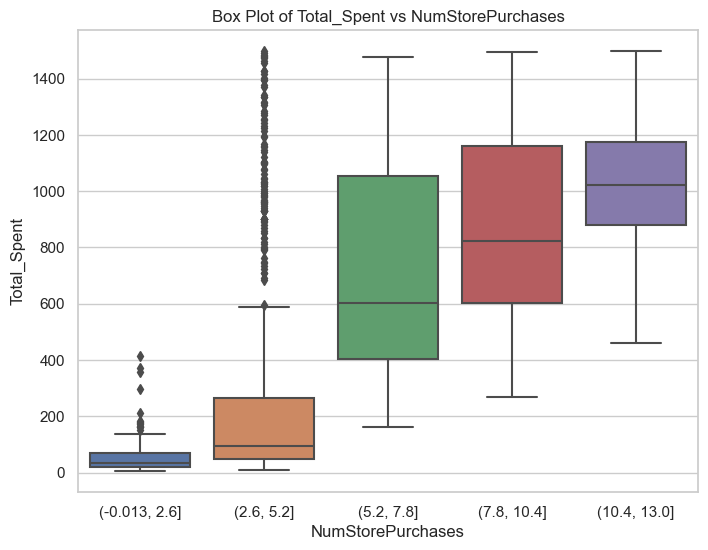

In [59]:
# Box plots for discrete variables
discrete_vars = ['NumWebPurchases', 'NumStorePurchases']

for var in discrete_vars:
    plt.figure(figsize=(8, 6))
    bins = pd.cut(df[var], bins=5)  # Divide the data into 5 bins
    sns.boxplot(data=df, x=bins, y='Total_Spent')
    plt.xlabel(var)
    plt.ylabel('Total_Spent')
    plt.title(f'Box Plot of Total_Spent vs {var}')
    plt.show()

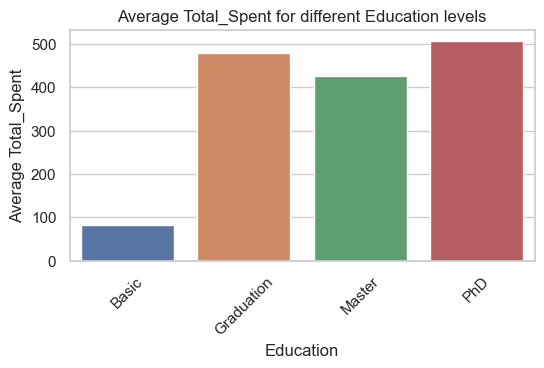

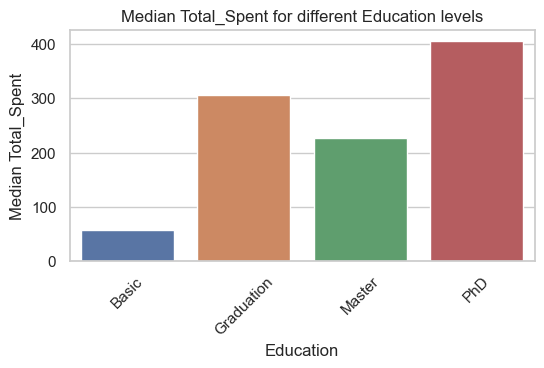

In [60]:
# Object variables for analysis
object_vars = ['Education', 'Marital_Status', 'Country', 'Response']

# Calculate average and median Total_Spent for each label of object variables
avg_total_spent = df.groupby('Education')['Total_Spent'].mean()
median_total_spent = df.groupby('Education')['Total_Spent'].median()

# Plot bar plot for average Total_Spent
plt.figure(figsize=(6, 3))
sns.barplot(x=avg_total_spent.index, y=avg_total_spent.values)
plt.xlabel('Education')
plt.ylabel('Average Total_Spent')
plt.title('Average Total_Spent for different Education levels')
plt.xticks(rotation=45)
plt.show()

# Plot bar plot for median Total_Spent
plt.figure(figsize=(6, 3))
sns.barplot(x=median_total_spent.index, y=median_total_spent.values)
plt.xlabel('Education')
plt.ylabel('Median Total_Spent')
plt.title('Median Total_Spent for different Education levels')
plt.xticks(rotation=45)
plt.show()

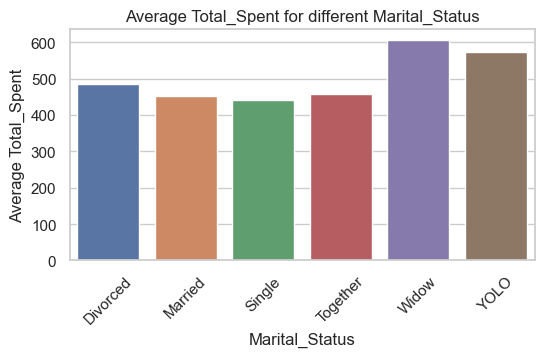

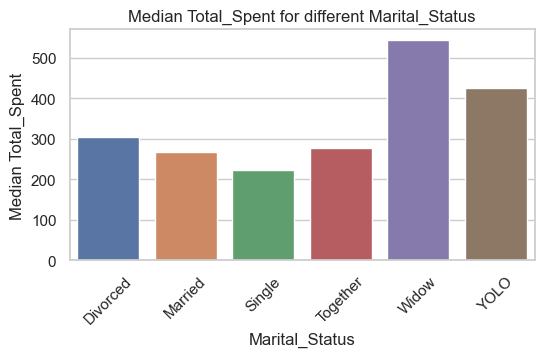

In [61]:
#for Marital_Status:
avg_total_spent_marital = df.groupby('Marital_Status')['Total_Spent'].mean()
median_total_spent_marital = df.groupby('Marital_Status')['Total_Spent'].median()

plt.figure(figsize=(6, 3))
sns.barplot(x=avg_total_spent_marital.index, y=avg_total_spent_marital.values)
plt.xlabel('Marital_Status')
plt.ylabel('Average Total_Spent')
plt.title('Average Total_Spent for different Marital_Status')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 3))
sns.barplot(x=median_total_spent_marital.index, y=median_total_spent_marital.values)
plt.xlabel('Marital_Status')
plt.ylabel('Median Total_Spent')
plt.title('Median Total_Spent for different Marital_Status')
plt.xticks(rotation=45)
plt.show()

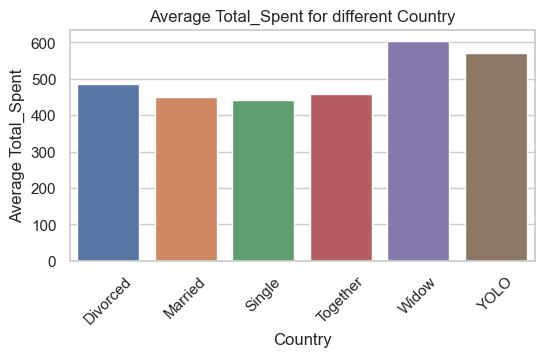

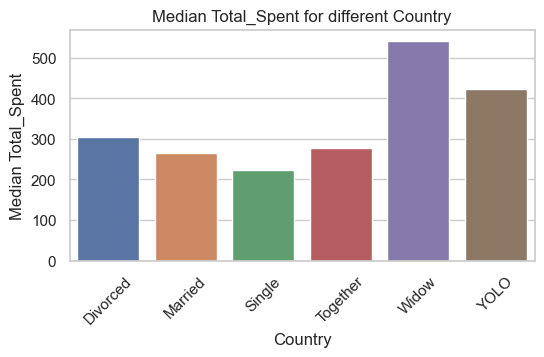

In [62]:
#for Country:
avg_total_spent_country = df.groupby('Country')['Total_Spent'].mean()
median_total_spent_country = df.groupby('Country')['Total_Spent'].median()

plt.figure(figsize=(6, 3))
sns.barplot(x=avg_total_spent_marital.index, y=avg_total_spent_marital.values)
plt.xlabel('Country')
plt.ylabel('Average Total_Spent')
plt.title('Average Total_Spent for different Country')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 3))
sns.barplot(x=median_total_spent_marital.index, y=median_total_spent_marital.values)
plt.xlabel('Country')
plt.ylabel('Median Total_Spent')
plt.title('Median Total_Spent for different Country')
plt.xticks(rotation=45)
plt.show()

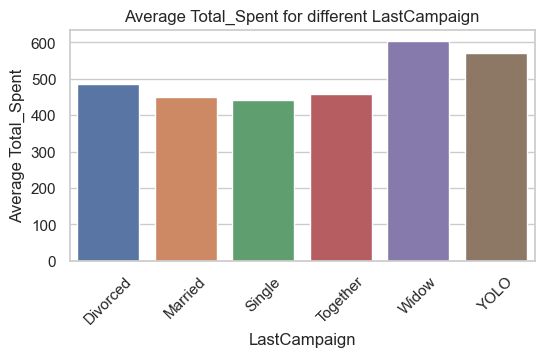

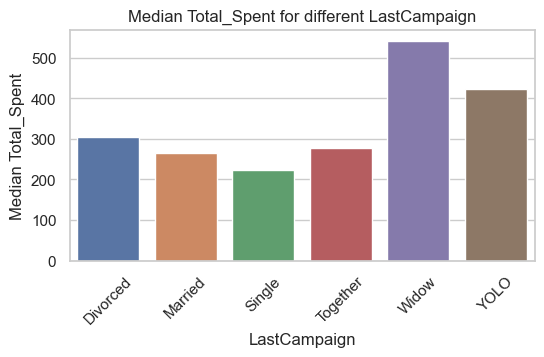

In [63]:
#for Response:
avg_total_spent_response = df.groupby('LastCampaign')['Total_Spent'].mean()
median_total_spent_response = df.groupby('LastCampaign')['Total_Spent'].median()

plt.figure(figsize=(6, 3))
sns.barplot(x=avg_total_spent_marital.index, y=avg_total_spent_marital.values)
plt.xlabel('LastCampaign')
plt.ylabel('Average Total_Spent')
plt.title('Average Total_Spent for different LastCampaign')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 3))
sns.barplot(x=median_total_spent_marital.index, y=median_total_spent_marital.values)
plt.xlabel('LastCampaign')
plt.ylabel('Median Total_Spent')
plt.title('Median Total_Spent for different LastCampaign')
plt.xticks(rotation=45)
plt.show()

Section 05: Open-ended questions and recommendations
### SET A

<AxesSubplot:xlabel='Income', ylabel='Total_Spent'>

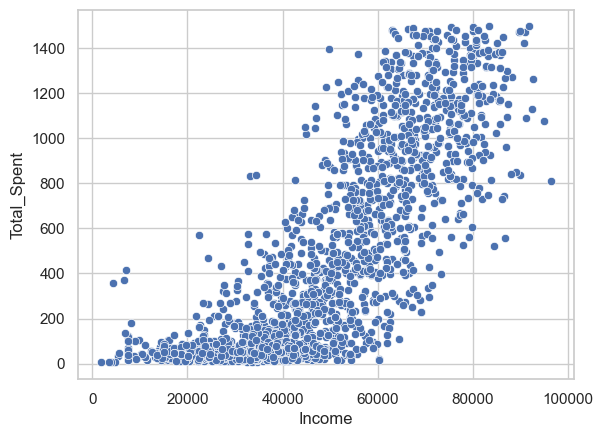

In [64]:
#1.What kind of customers spend more?

# Visualize the relationship between Income and Total_Spent
sns.scatterplot(data=df, x="Income", y="Total_Spent")

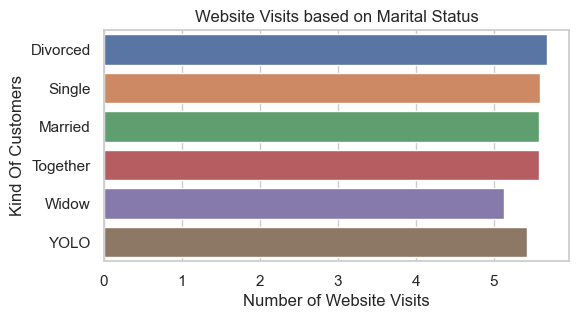

In [65]:
#2.What kind of customers had a higher Website conversion?

# Create a bar plot to compare WebsiteVisits with WebsiteConversion
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x="NumWebVisitsMonth", y="Marital_Status", ci = None)
plt.xlabel("Number of Website Visits")
plt.ylabel("Kind Of Customers")
plt.title("Website Visits based on Marital Status")
plt.show()

Correlation between WebsiteVisits and Total_Spent: -0.46380784952151566


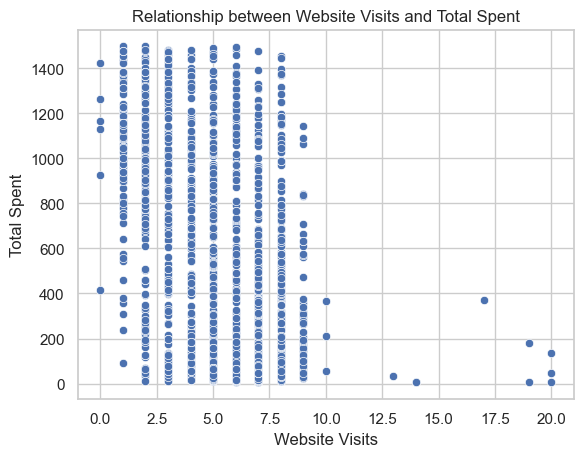

In [66]:
#3."Website visits helped drive overall sales". Justify or refute this statement using an appropriate summary

# Calculate correlation between WebsiteVisits and Total_Spent
correlation = df["NumWebVisitsMonth"].corr(df["Total_Spent"])
print(f"Correlation between WebsiteVisits and Total_Spent: {correlation}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(data=df, x="NumWebVisitsMonth", y="Total_Spent")
plt.xlabel("Website Visits")
plt.ylabel("Total Spent")
plt.title("Relationship between Website Visits and Total Spent")
plt.show()

Correlation on Amount Spent between MeatProducts and FishProducts: 0.5862719221058823


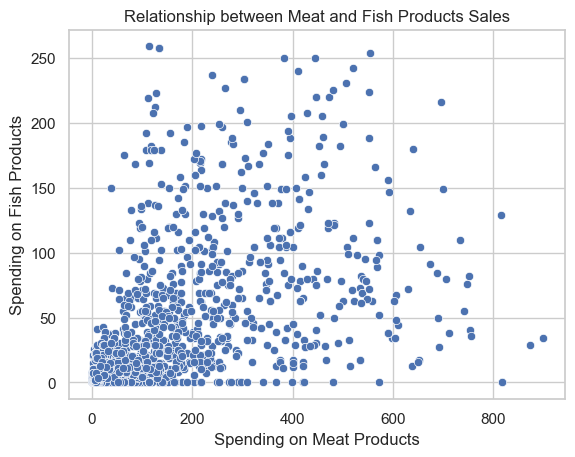

In [67]:
#4.Is there any relationship between sales of Meat and Fish products?

# Calculate correlation between MntMeatProducts and MntFishProducts
correlation = df["AmtSpent_Meat"].corr(df["AmtSpent_Fish"])
print(f"Correlation on Amount Spent between MeatProducts and FishProducts: {correlation}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(data=df, x="AmtSpent_Meat", y="AmtSpent_Fish")
plt.xlabel("Spending on Meat Products")
plt.ylabel("Spending on Fish Products")
plt.title("Relationship between Meat and Fish Products Sales")
plt.show()

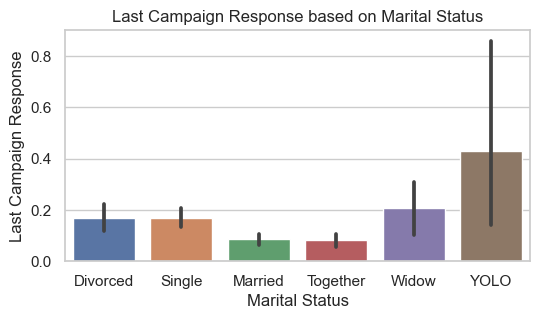

In [68]:
#5.What kind of customers responded the most in the last campaign?

# Create a bar plot to compare the last campaign response for different customer segments
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x="Marital_Status", y="LastCampaign")
plt.xlabel("Marital Status")
plt.ylabel("Last Campaign Response")
plt.title("Last Campaign Response based on Marital Status")
plt.show()

### SET B

In [69]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'AmtSpent_Wine', 'AmtSpent_Fruit', 'AmtSpent_Meat', 'AmtSpent_Fish',
       'AmtSpent_Sweet', 'AmtSpent_Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Campaign3', 'Campaign4', 'Campaign5', 'Campaign1',
       'Campaign2', 'LastCampaign', 'Complain', 'Country', 'Members',
       'Total_Spent', 'Income_Seg', 'NumWebVisitsCategory',
       'NumStorePurchasesCategory', 'DiscountPurchasesCategory'],
      dtype='object')

In [70]:
# Group the data by "Marital_Status" and calculate the average spending on each product type
product_types = ['AmtSpent_Wine', 'AmtSpent_Fruit','AmtSpent_Meat', 'AmtSpent_Fish', 'AmtSpent_Sweet', 'AmtSpent_Gold']
spending_by_marital_status = df.groupby("Marital_Status")[product_types].mean()
spending_by_marital_status

,AmtSpent_Wine,AmtSpent_Fruit,AmtSpent_Meat,AmtSpent_Fish,AmtSpent_Sweet,AmtSpent_Gold
Marital_Status,,,,,,
Divorced,261.251208,21.888889,112.700483,27.309179,20.806763,40.990338
Married,230.155556,20.850980,108.972549,29.312418,22.694118,38.865359
Single,209.394161,21.776156,119.121655,29.985401,19.985401,40.739659
Together,233.743083,19.632411,115.851779,30.824111,20.367589,37.727273
Widow,309.529412,30.352941,139.088235,42.382353,33.500000,49.970588
YOLO,272.714286,26.714286,114.857143,63.142857,12.571429,81.857143


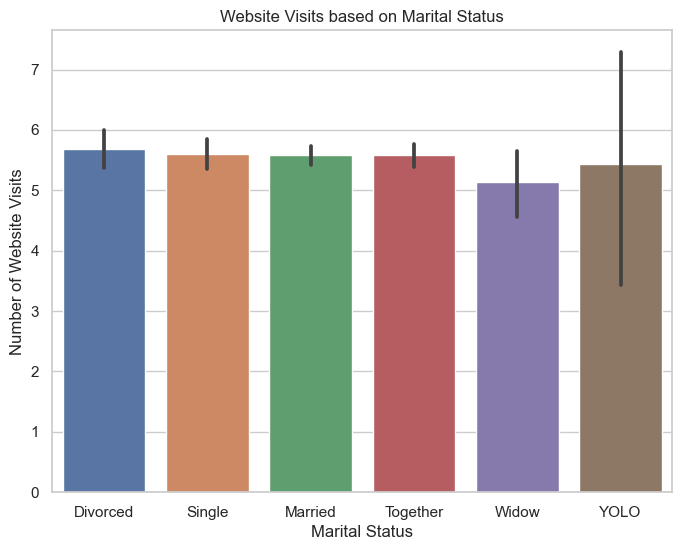

In [71]:
#7.What kind of customers made more Website visits?

# Create a bar plot to compare WebsiteVisits for different customer segments
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="Marital_Status", y="NumWebVisitsMonth")
plt.xlabel("Marital Status")
plt.ylabel("Number of Website Visits")
plt.title("Website Visits based on Marital Status")
plt.show()

Correlation between Wine and Meat Products Sales: 0.4960672675706803


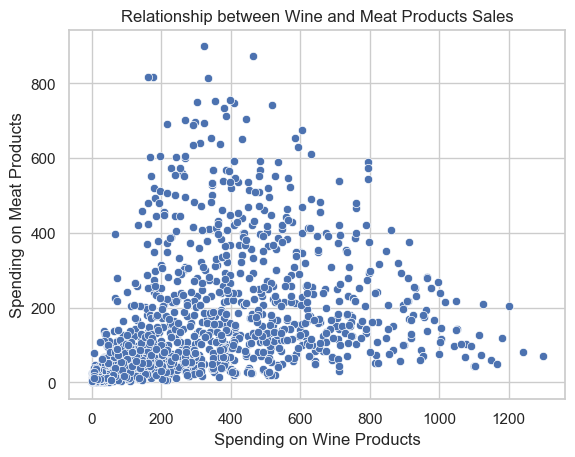

In [72]:
#8.Is there any relationship between sales of Wine and Meat products?

# Calculate correlation between MntWines and MntMeatProducts
correlation = df["AmtSpent_Wine"].corr(df["AmtSpent_Meat"])
print(f"Correlation between Wine and Meat Products Sales: {correlation}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(data=df, x="AmtSpent_Wine", y="AmtSpent_Meat")
plt.xlabel("Spending on Wine Products")
plt.ylabel("Spending on Meat Products")
plt.title("Relationship between Wine and Meat Products Sales")
plt.show()


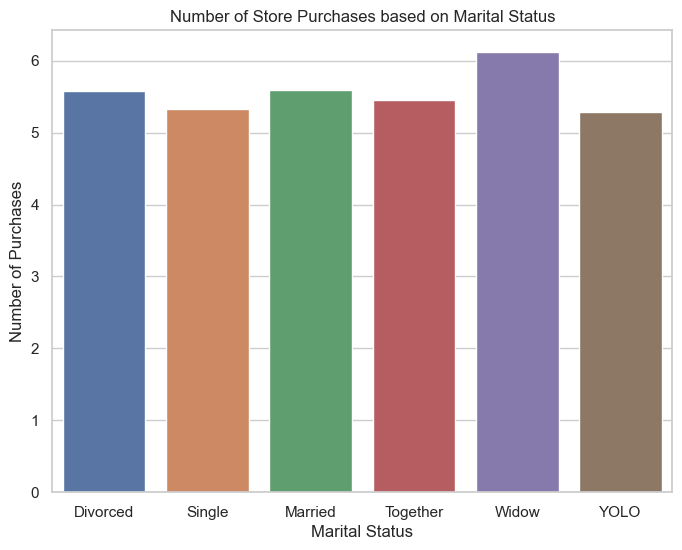

In [73]:
#9.Did certain customers prefer Web Purchase over Store Purchases? If yes, how were their profiles different?

# Create a bar plot to compare Marital_Status and StorePurchases for different customer segments
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="Marital_Status", y="NumStorePurchases", ci=None)
plt.xlabel("Marital Status")
plt.ylabel("Number of Purchases")
plt.title("Number of Store Purchases based on Marital Status")
plt.show()


In [74]:
#10.Is customer complaints an area of concern that should be closely looked at? Show appropriate metrics to support your response.

# Calculate the total number of customer complaints
total_complaints = df["Complain"].sum()

# Calculate the percentage of customers with complaints
percentage_complaining = (total_complaints / len(df)) * 100

# Print the metrics
print(f"Total Customer Complaints: {total_complaints}")
print(f"Percentage of Customers with Complaints: {percentage_complaining:.2f}%")


Total Customer Complaints: 21
Percentage of Customers with Complaints: 1.07%


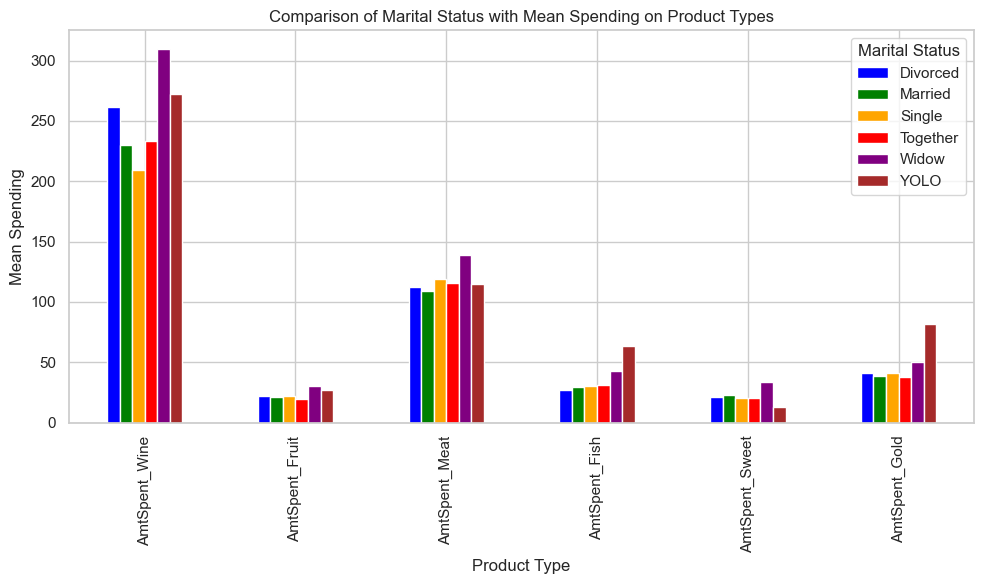

In [75]:
# Group the data by 'Marital_Status' and calculate the mean spending for each category
grouped_data = df.groupby('Marital_Status')[['AmtSpent_Wine', 'AmtSpent_Fruit','AmtSpent_Meat', 'AmtSpent_Fish', 'AmtSpent_Sweet', 'AmtSpent_Gold']].mean()

# Transpose the data for easy plotting
grouped_data = grouped_data.transpose()

# Define the colors for different bars
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=ax, color=colors)

# Set the labels and title
ax.set_xlabel('Product Type')
ax.set_ylabel('Mean Spending')
ax.set_title('Comparison of Marital Status with Mean Spending on Product Types')

# Show the legend
ax.legend(title='Marital Status')

# Show the plot
plt.tight_layout()
plt.show()

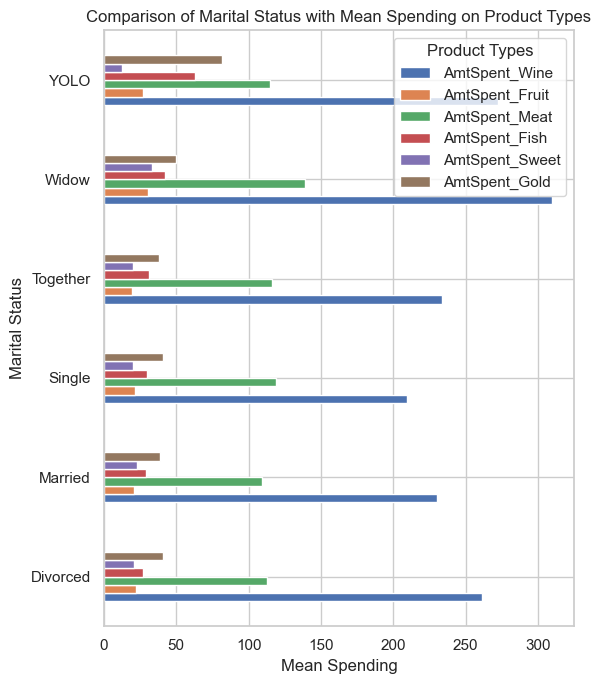

In [76]:
# Group the data by 'Marital_Status' and calculate the mean spending for each category
grouped_data = df.groupby('Marital_Status')[['AmtSpent_Wine', 'AmtSpent_Fruit','AmtSpent_Meat', 'AmtSpent_Fish', 'AmtSpent_Sweet', 'AmtSpent_Gold']].mean()

# Create the plot
fig, ax = plt.subplots(figsize=(6, 7))
grouped_data.plot(kind='barh', ax=ax)

# Set the labels and title
ax.set_xlabel('Mean Spending')
ax.set_ylabel('Marital Status')
ax.set_title('Comparison of Marital Status with Mean Spending on Product Types')

# Show the legend
ax.legend(title='Product Types')

# Show the plot
plt.tight_layout()
plt.show()

In [77]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'AmtSpent_Wine', 'AmtSpent_Fruit', 'AmtSpent_Meat', 'AmtSpent_Fish',
       'AmtSpent_Sweet', 'AmtSpent_Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Campaign3', 'Campaign4', 'Campaign5', 'Campaign1',
       'Campaign2', 'LastCampaign', 'Complain', 'Country', 'Members',
       'Total_Spent', 'Income_Seg', 'NumWebVisitsCategory',
       'NumStorePurchasesCategory', 'DiscountPurchasesCategory'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

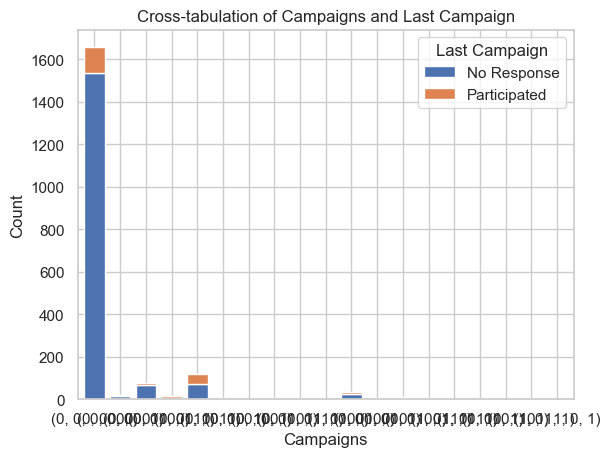

In [78]:
# Create a crosstab for all the campaigns
cross_tab = pd.crosstab([df['Campaign1'], df['Campaign2'], df['Campaign3'], df['Campaign4'], df['Campaign5']], df['LastCampaign'])

# Plot the stacked bar chart
#colors = ['gray', 'blue']
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar', stacked=True, width=0.8)
plt.title('Cross-tabulation of Campaigns and Last Campaign')
plt.xlabel('Campaigns')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Response', 'Participated'], title='Last Campaign')
plt.show()

<Figure size 1200x600 with 0 Axes>

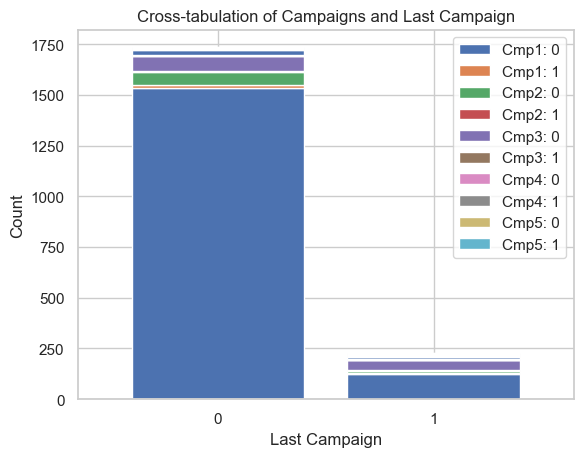

In [79]:
# Create a crosstab for all the campaigns and last_Campaign
cross_tab = pd.crosstab(df['LastCampaign'], [df['Campaign1'], df['Campaign2'], df['Campaign3'], df['Campaign4'], df['Campaign5']])

# Plot the stacked bar chart

plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar', stacked=True, width=0.8)
plt.title('Cross-tabulation of Campaigns and Last Campaign')
plt.xlabel('Last Campaign')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Cmp1: 0', 'Cmp1: 1', 'Cmp2: 0', 'Cmp2: 1', 'Cmp3: 0', 'Cmp3: 1', 'Cmp4: 0', 'Cmp4: 1', 'Cmp5: 0', 'Cmp5: 1'])
plt.show()